In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Saving Lenna_(test_image).png to Lenna_(test_image).png


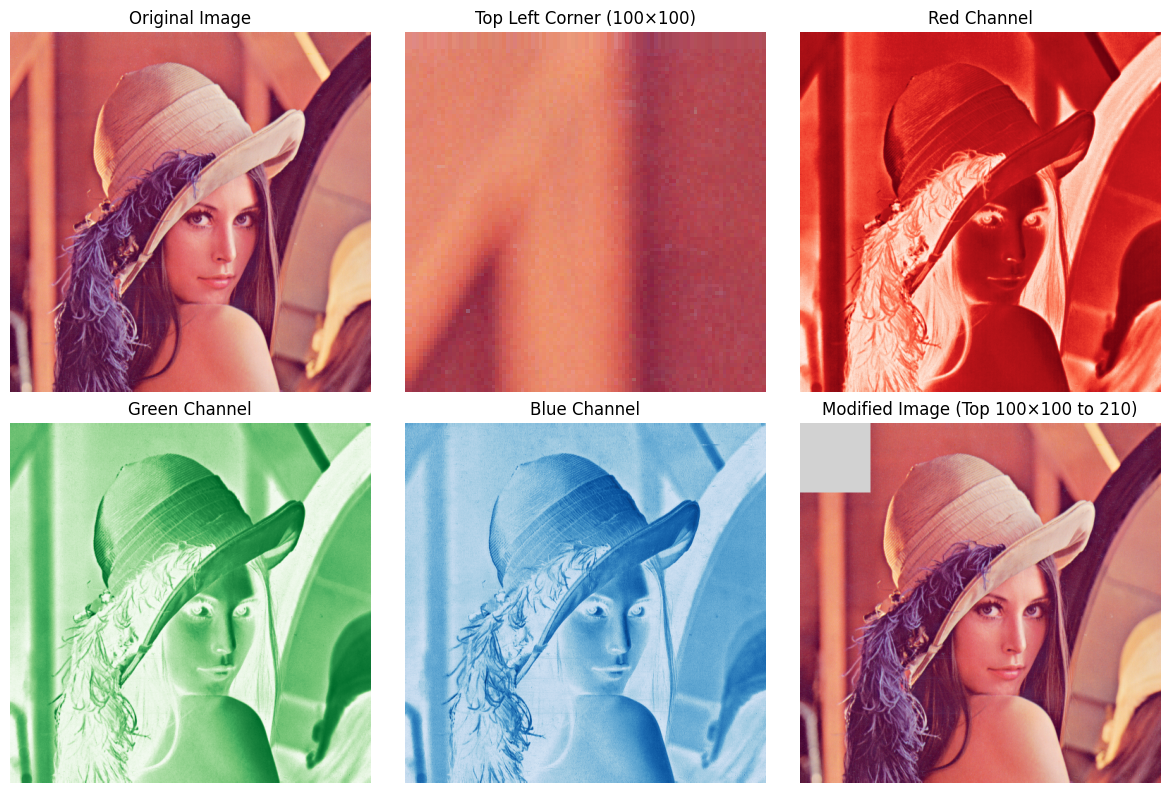

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Step 1: Upload an image manually
uploaded = files.upload()  # This will prompt file upload in Colab

# Get the uploaded image filename
image_path = list(uploaded.keys())[0]

# Load the image
image = Image.open(image_path)

# Convert to NumPy array
image_np = np.array(image)

# Extract the top-left 100x100 region
top_left = image_np[:100, :100]

# Extract color channels
red_channel = image_np[:, :, 0]
green_channel = image_np[:, :, 1]
blue_channel = image_np[:, :, 2]

# Modify the top-left 100x100 pixels to 210 (light gray)
modified_image = image_np.copy()
modified_image[:100, :100] = 210

# Display results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Original image
axes[0, 0].imshow(image_np)
axes[0, 0].set_title("Original Image")

# Top-left corner
axes[0, 1].imshow(top_left)
axes[0, 1].set_title("Top Left Corner (100×100)")

# Red channel
axes[0, 2].imshow(red_channel, cmap="Reds")
axes[0, 2].set_title("Red Channel")

# Green channel
axes[1, 0].imshow(green_channel, cmap="Greens")
axes[1, 0].set_title("Green Channel")

# Blue channel
axes[1, 1].imshow(blue_channel, cmap="Blues")
axes[1, 1].set_title("Blue Channel")

# Modified image
axes[1, 2].imshow(modified_image)
axes[1, 2].set_title("Modified Image (Top 100×100 to 210)")

# Remove axes for better visibility
for ax in axes.flatten():
    ax.axis("off")

plt.tight_layout()
plt.show()

Saving cameraman.png to cameraman.png


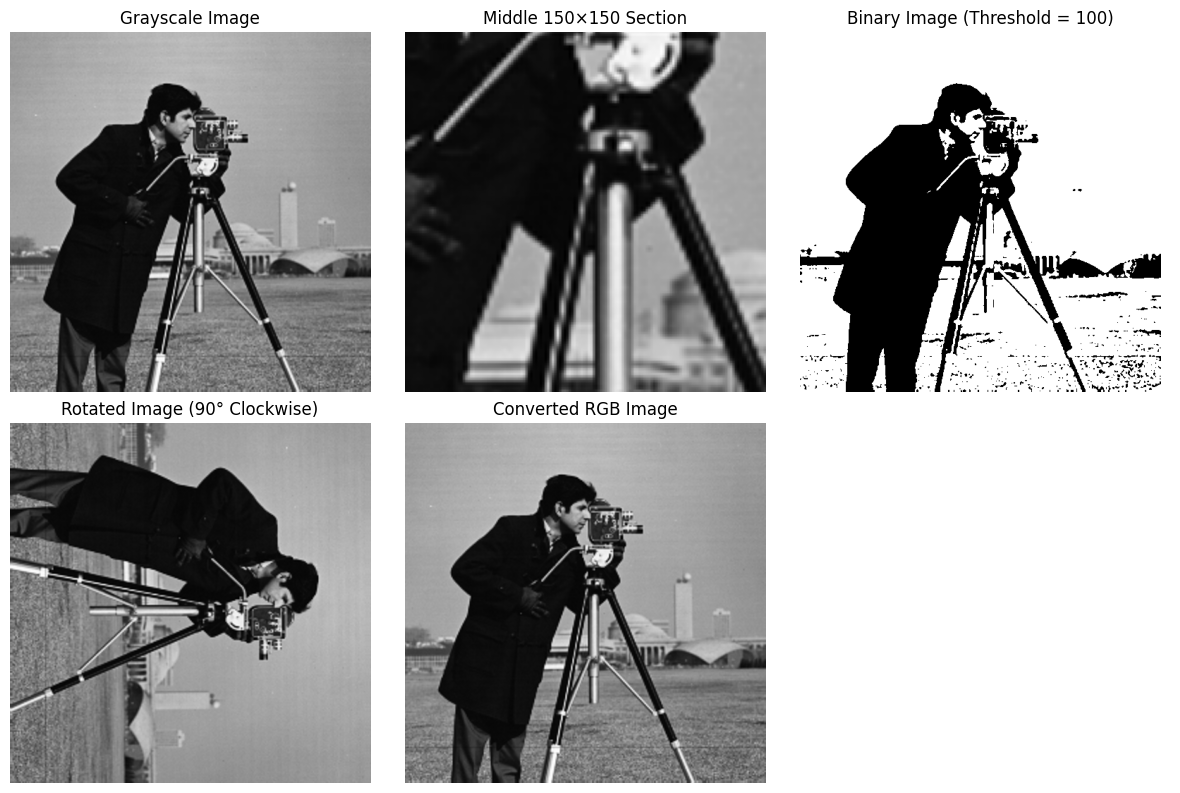

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Step 1: Upload an image manually
uploaded = files.upload()  # This will prompt file upload in Colab

# Get the uploaded image filename
image_path = list(uploaded.keys())[0]

# Load the image in grayscale mode
image = Image.open(image_path).convert("L")  # Convert to grayscale

# Convert to NumPy array
image_np = np.array(image)

# Get image dimensions
height, width = image_np.shape

# Extract the middle 150×150 pixel section
start_row = (height - 150) // 2
start_col = (width - 150) // 2
middle_section = image_np[start_row : start_row + 150, start_col : start_col + 150]

# Apply thresholding (binary image)
threshold = 100
binary_image = np.where(image_np < threshold, 0, 255).astype(np.uint8)

# Rotate image 90 degrees clockwise
rotated_image = np.rot90(image_np, k=-1)  # Rotate clockwise using NumPy

# Convert grayscale to RGB (replicating values across 3 channels)
rgb_image = np.stack([image_np] * 3, axis=-1)  # Convert to RGB

# Display results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

# Grayscale image
axes[0, 0].imshow(image_np, cmap="gray")
axes[0, 0].set_title("Grayscale Image")

# Middle 150×150 pixel section
axes[0, 1].imshow(middle_section, cmap="gray")
axes[0, 1].set_title("Middle 150×150 Section")

# Binary thresholded image
axes[0, 2].imshow(binary_image, cmap="gray")
axes[0, 2].set_title("Binary Image (Threshold = 100)")

# Rotated image
axes[1, 0].imshow(rotated_image, cmap="gray")
axes[1, 0].set_title("Rotated Image (90° Clockwise)")

# RGB Image
axes[1, 1].imshow(rgb_image)
axes[1, 1].set_title("Converted RGB Image")

# Remove axes for better visibility
for ax in axes.flatten():
    ax.axis("off")

plt.tight_layout()
plt.show()

Saving lenna_image.png to lenna_image.png


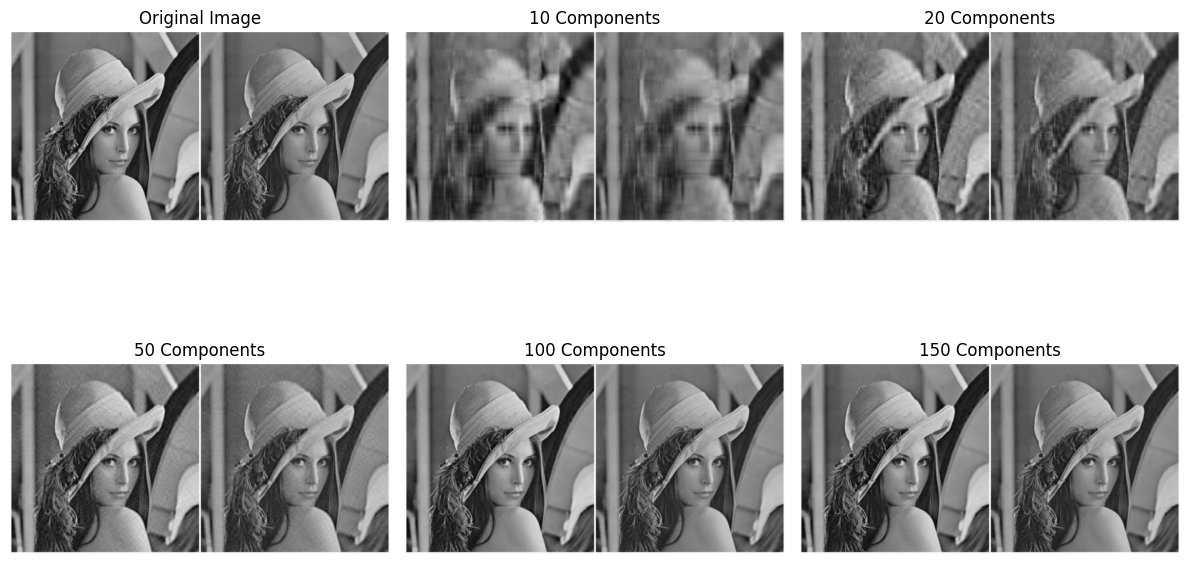

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Step 1: Upload an image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load and convert image to grayscale
image = Image.open(image_path).convert("L")  # Convert to grayscale
image_np = np.array(image, dtype=np.float32)  # Convert to NumPy array (float)

# Step 2: Standardize the data (Centering)
mean = np.mean(image_np, axis=0)
standardized_data = image_np - mean  # Mean centering

# Step 3: Compute the covariance matrix
cov_matrix = np.cov(standardized_data, rowvar=False)

# Step 4: Compute Eigenvalues & Eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Step 5: Sort Eigenvalues & Eigenvectors in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Different compression levels to experiment with
components_list = [10, 20, 50, 100, 150]
reconstructed_images = []

for k in components_list:
    # Select top k eigenvectors
    top_eigenvectors = eigenvectors[:, :k]

    # Project the data onto the new lower-dimensional space
    lower_dimensional_representation = np.dot(standardized_data, top_eigenvectors)

    # Reconstruct the image using only k principal components
    reconstructed_image = np.dot(lower_dimensional_representation, top_eigenvectors.T) + mean
    reconstructed_images.append(reconstructed_image)

# Step 6: Display Results
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

# Original Image
axes[0].imshow(image_np, cmap="gray")
axes[0].set_title("Original Image")

# Reconstructed Images at different compression levels
for i, (k, img) in enumerate(zip(components_list, reconstructed_images)):
    axes[i + 1].imshow(img, cmap="gray")
    axes[i + 1].set_title(f"{k} Components")

# Remove axes for better visualization
for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()